# Local Deployment

Machine learning models are only as useful as their ability to be deployed and used in the real world. Local deployment is an essential first step toward operationalizing models, especially during development, testing, or prototyping phases. In this part, you will learn how to deploy models locally using FastAPI for serving, Streamlit for interaction, and Docker for containerization. These tools will enable you to package your solution in a reproducible, sharable, and isolated environment.

Batch inference vs Real time inference

When deploying machine learning models, it's important to understand the two common modes of serving predictions: batch inference and real-time inference.

Batch inference is used when predictions can be made for a large number of records at once, usually as part of a scheduled or background job. This is common in use cases like updating recommendations overnight, scoring customers for a monthly churn report, or applying models to historical data. Batch inference typically reads input data from files or databases, processes it in bulk, and stores the results back in a storage layer. It doesn’t require low-latency or immediate response. Tools like Apache Spark, pandas scripts, or cloud pipelines are often used.

Real-time inference, on the other hand, is designed for scenarios where a prediction is needed immediately, such as recommending a product when a user clicks a page, detecting fraud as a transaction occurs, or powering chatbot interactions. This mode requires low latency and high availability. It usually involves deploying models behind a REST API (e.g., with FastAPI) or a web app interface (e.g., Streamlit) that can respond instantly to user input or application requests.

In practice, you’ll often combine both approaches: use batch inference for offline processing and insights, and real-time inference for critical, user-facing tasks. When designing your deployment strategy, carefully consider the performance needs, infrastructure costs, and user expectations.

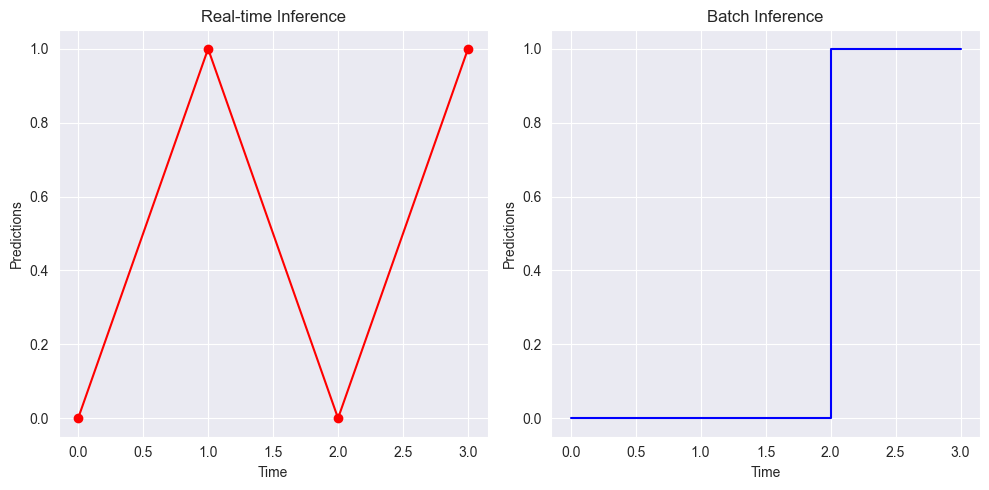

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization of inference types
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Real-time Inference")
plt.plot([0, 1, 2, 3], [0, 1, 0, 1], 'ro-')
plt.xlabel("Time")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.title("Batch Inference")
plt.step([0, 1, 2, 3], [0, 0, 1, 1], 'b-', where='post')
plt.xlabel("Time")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()


# Real Time Inference

In [4]:
import time

def real_time_inference(model, input_data):
    start_time = time.time()
    prediction = model.predict(input_data)
    end_time = time.time()

    latency = end_time - start_time
    print(f"Prediction: {prediction}")
    print(f"Latency: {latency:.4f} seconds")

    return prediction

# Example usage
class DummyModel:
    def predict(self, data):
        time.sleep(0.1)   # Simulate processing time
        return data * 2

model = DummyModel()
result = real_time_inference(model, 5)


Prediction: 10
Latency: 0.1050 seconds


# Batch Inference

In [5]:
import pandas as pd

def batch_inference(model, data_batch):
    start_time = time.time()
    predictions = model.predict(data_batch)
    end_time = time.time()

    total_time = end_time - start_time
    avg_time_per_sample = total_time / len(data_batch)

    print(f"Total processing time: {total_time:.4f} seconds")
    print(f"Average time per sample: {avg_time_per_sample:.4f} seconds")

    return predictions

# Example usage
data_batch = pd.DataFrame({'feature1': [1, 2, 3, 4, 5], 'feature2': [5, 4, 3, 2, 1]})
results = batch_inference(model, data_batch)


Total processing time: 0.1045 seconds
Average time per sample: 0.0209 seconds


# Comparisons

In [9]:
import matplotlib.pyplot as plt

def compare_inference_types(data_sizes):
    real_time_latencies = []
    batch_latencies = []

    for size in data_sizes:
        # Simulate real-time inference
        start = time.time()
        for _ in range(size):
            real_time_inference(model, 5)
        real_time_latencies.append((time.time() - start) / size)

        # Simulate batch inference
        batch_data = pd.DataFrame({'feature1': [5] * size})
        start = time.time()
        batch_inference(model, batch_data)
        batch_latencies.append((time.time() - start) / size)

    plt.plot(data_sizes, real_time_latencies, label='Real-time')
    plt.plot(data_sizes, batch_latencies, label='Batch')
    plt.xlabel('Batch Size')
    plt.ylabel('Average Latency (s)')
    plt.title('Inference Latency Comparison')
    plt.legend()
    plt.show()

compare_inference_types([10, 100, 1000, 10000])


Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1020 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1025 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1050 seconds
Total processing time: 0.1051 seconds
Average time per sample: 0.0105 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1016 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0.1015 seconds
Prediction: 10
Latency: 0.1013 seconds
Prediction: 10
Latency: 0.1000 seconds
Prediction: 10
Latency: 0.1040 seconds
Prediction: 10
Latency: 0.1051 seconds
Prediction: 10
Latency: 0.1006 seconds
Prediction: 10
Latency: 0.1011 seconds
Prediction: 10
Latency: 0.1028 seconds
Prediction: 10
Latency: 0.1015 seconds
Prediction: 10
Latency: 0.1050 seconds
Prediction: 10
Latency: 0

KeyboardInterrupt: 

# Real-life Example: Image Classification

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')

def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def classify_image(model, img_path):
    processed_img = process_image(img_path)
    preds = model.predict(processed_img)
    return decode_predictions(preds, top=1)[0][0]

# Real-time inference
img_path = '/Users/guywinfield/Documents/Personal/OPAR0182.jpg'
result = classify_image(model, img_path)
print(f"Real-time classification: {result[1]} ({result[2]:.2f})")

# Batch inference
img_paths = ['/Users/guywinfield/Documents/Personal/OPAR0182.jpg', '/Users/guywinfield/Documents/Personal/OPAR0183.jpg', '/Users/guywinfield/Documents/Personal/OPAR0720.jpg']
batch = np.vstack([process_image(path) for path in img_paths])
preds = model.predict(batch)
results = decode_predictions(preds, top=1)

for i, result in enumerate(results):
    print(f"Batch classification {i+1}: {result[0][1]} ({result[0][2]:.2f})")


# Real-time inference

In [1]:
import asyncio

async def real_time_inference_service(request_queue):
    while True:
        request = await request_queue.get()
        result = await process_request(request)
        print(f"Processed request: {result}")

async def process_request(request):
    # Simulate processing time
    await asyncio.sleep(0.1)
    return f"Result for {request}"

async def main():
    request_queue = asyncio.Queue()

    # Start the inference service
    asyncio.create_task(real_time_inference_service(request_queue))

    # Simulate incoming requests
    for i in range(5):
        await request_queue.put(f"Request {i}")
        await asyncio.sleep(0.05)   # Simulate varying request rates

    # Wait for all requests to be processed
    await request_queue.join()

asyncio.run(main())


RuntimeError: asyncio.run() cannot be called from a running event loop

# Batch Inference

In [2]:
import schedule
import time

def batch_process():
    print("Starting batch processing...")
    # Simulate batch processing
    time.sleep(2)
    print("Batch processing completed.")

def run_scheduler():
    schedule.every().day.at("02:00").do(batch_process)

    while True:
        schedule.run_pending()
        time.sleep(1)

# Simulate a day's worth of scheduling in a few seconds
for _ in range(24 * 60):   # 24 hours * 60 minutes
    schedule.run_pending()
    time.sleep(0.05)  # 0.05 seconds represent 1 minute in this simulation


ModuleNotFoundError: No module named 'schedule'

# Hybird Approach

In [3]:
import threading
import queue
import time

class HybridInferenceSystem:
    def __init__(self, batch_size=10, batch_interval=5):
        self.queue = queue.Queue()
        self.batch_size = batch_size
        self.batch_interval = batch_interval
        self.last_batch_time = time.time()

    def real_time_inference(self, data):
        result = f"Real-time result for {data}"
        print(result)
        return result

    def batch_inference(self, batch):
        results = [f"Batch result for {item}" for item in batch]
        print(f"Processed batch of {len(batch)} items")
        return results

    def process_request(self, data):
        self.queue.put(data)
        if self.queue.qsize() >= self.batch_size or (time.time() - self.last_batch_time) > self.batch_interval:
            self.process_batch()
        else:
            return self.real_time_inference(data)

    def process_batch(self):
        batch = []
        while not self.queue.empty() and len(batch) < self.batch_size:
            batch.append(self.queue.get())
        if batch:
            results = self.batch_inference(batch)
            self.last_batch_time = time.time()
            return results

# Usage
system = HybridInferenceSystem()
for i in range(25):
    system.process_request(f"Data {i}")
    time.sleep(0.5)


Real-time result for Data 0
Real-time result for Data 1
Real-time result for Data 2
Real-time result for Data 3
Real-time result for Data 4
Real-time result for Data 5
Real-time result for Data 6
Real-time result for Data 7
Real-time result for Data 8
Processed batch of 10 items
Real-time result for Data 10
Real-time result for Data 11
Real-time result for Data 12
Real-time result for Data 13
Real-time result for Data 14
Real-time result for Data 15
Real-time result for Data 16
Real-time result for Data 17
Real-time result for Data 18
Processed batch of 10 items
Real-time result for Data 20
Real-time result for Data 21
Real-time result for Data 22
Real-time result for Data 23
Real-time result for Data 24


# Scalability in Real-time Inference

In [4]:
import random
from concurrent.futures import ThreadPoolExecutor

class LoadBalancer:
    def __init__(self, num_workers=3):
        self.workers = [InferenceWorker(i) for i in range(num_workers)]

    def process_request(self, request):
        worker = random.choice(self.workers)
        return worker.process(request)

class InferenceWorker:
    def __init__(self, worker_id):
        self.worker_id = worker_id

    def process(self, request):
        # Simulate processing time
        time.sleep(random.uniform(0.1, 0.5))
        return f"Worker {self.worker_id} processed: {request}"

# Usage
load_balancer = LoadBalancer()

with ThreadPoolExecutor(max_workers=10) as executor:
    requests = [f"Request {i}" for i in range(20)]
    results = list(executor.map(load_balancer.process_request, requests))

for result in results:
    print(result)


Worker 2 processed: Request 0
Worker 0 processed: Request 1
Worker 1 processed: Request 2
Worker 0 processed: Request 3
Worker 2 processed: Request 4
Worker 1 processed: Request 5
Worker 2 processed: Request 6
Worker 0 processed: Request 7
Worker 0 processed: Request 8
Worker 1 processed: Request 9
Worker 0 processed: Request 10
Worker 2 processed: Request 11
Worker 1 processed: Request 12
Worker 2 processed: Request 13
Worker 0 processed: Request 14
Worker 2 processed: Request 15
Worker 2 processed: Request 16
Worker 1 processed: Request 17
Worker 2 processed: Request 18
Worker 1 processed: Request 19


# Optimising Batch Inference

In [5]:
from multiprocessing import Pool

def process_partition(partition):
    # Simulate processing a partition of data
    time.sleep(0.5)
    return f"Processed partition: {partition}"

def optimized_batch_inference(data, num_partitions=4):
    partitions = np.array_split(data, num_partitions)

    with Pool(processes=num_partitions) as pool:
        results = pool.map(process_partition, partitions)

    return results

# Usage
large_dataset = list(range(1000))
results = optimized_batch_inference(large_dataset)
print(f"Processed {len(results)} partitions")


NameError: name 'np' is not defined

/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/pygments/regexopt.py:78: RuntimeWarning: coroutine 'main' was never awaited
  for group in groupby(strings, lambda s: s[0] == first[0])) \


# Monitoring & Logging

In [6]:
import logging
from functools import wraps

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def log_inference(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()

        logger.info(f"{func.__name__} completed in {end_time - start_time:.4f} seconds")
        return result
    return wrapper

@log_inference
def sample_inference(data):
    # Simulate inference
    time.sleep(random.uniform(0.1, 0.5))
    return f"Inference result for {data}"

# Usage
for i in range(5):
    result = sample_inference(f"Data {i}")
    print(result)


INFO:__main__:sample_inference completed in 0.4410 seconds
INFO:__main__:sample_inference completed in 0.1611 seconds


Inference result for Data 0
Inference result for Data 1


INFO:__main__:sample_inference completed in 0.4104 seconds


Inference result for Data 2


INFO:__main__:sample_inference completed in 0.3200 seconds
INFO:__main__:sample_inference completed in 0.1308 seconds


Inference result for Data 3
Inference result for Data 4


# Error Handling and Fault Tolerance

In [7]:
import random

class InferenceError(Exception):
    pass

def unreliable_inference(data):
    if random.random() < 0.3:   # 30% chance of failure
        raise InferenceError("Inference failed")
    return f"Inference result for {data}"

def retry_inference(data, max_retries=3):
    for attempt in range(max_retries):
        try:
            return unreliable_inference(data)
        except InferenceError as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt == max_retries - 1:
                raise
            time.sleep(0.5 * (attempt + 1))   # Exponential backoff

# Usage
for i in range(5):
    try:
        result = retry_inference(f"Data {i}")
        print(f"Success: {result}")
    except InferenceError:
        print(f"Failed to process Data {i} after maximum retries")


Success: Inference result for Data 0
Success: Inference result for Data 1
Success: Inference result for Data 2
Success: Inference result for Data 3
Attempt 1 failed: Inference failed
Success: Inference result for Data 4


# Caching in Real-time Inference

In [9]:
from functools import lru_cache

@lru_cache(maxsize=100)
def cached_inference(data):
    # Simulate a computationally expensive inference
    time.sleep(0.5)
    return f"Inference result for {data}"

def measure_inference_time(func, data):
    start_time = time.time()
    result = func(data)
    end_time = time.time()
    print(f"Inference for {data}: {result}")
    print(f"Time taken: {end_time - start_time:.4f} seconds")

# Usage
for _ in range(2):   # Run twice to show caching effect
    for data in ["A", "B", "C", "A", "B"]:
        measure_inference_time(cached_inference, data)
    print("----")


Inference for A: Inference result for A
Time taken: 0.5045 seconds
Inference for B: Inference result for B
Time taken: 0.5050 seconds
Inference for C: Inference result for C
Time taken: 0.5050 seconds
Inference for A: Inference result for A
Time taken: 0.0000 seconds
Inference for B: Inference result for B
Time taken: 0.0000 seconds
----
Inference for A: Inference result for A
Time taken: 0.0000 seconds
Inference for B: Inference result for B
Time taken: 0.0000 seconds
Inference for C: Inference result for C
Time taken: 0.0000 seconds
Inference for A: Inference result for A
Time taken: 0.0000 seconds
Inference for B: Inference result for B
Time taken: 0.0000 seconds
----


# Real-life example: Sentiment Analysis

In [12]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Real-time inference
def real_time_sentiment_analysis(review):
    sentiment = analyze_sentiment(review)
    print(f"Real-time analysis → Review: {review[:30]}... | Sentiment: {sentiment}")

# Batch inference
def batch_sentiment_analysis(reviews):
    results = []
    for review in reviews:
        sentiment = analyze_sentiment(review)
        results.append((review[:30], sentiment))
    return results

# Usage
reviews = [
    "I love this product! It’s amazing.",
    "This is the worst experience I’ve ever had.",
    "The service was okay, nothing special.",
    "I can’t believe how great this is!",
    "I am very disappointed with the quality."
]

print("Real-time analysis:")
for review in reviews:
    real_time_sentiment_analysis(review)

print("\nBatch analysis:")
batch_results = batch_sentiment_analysis(reviews)
for review, sentiment in batch_results:
    print(f"Batch analysis → Review: {review}... | Sentiment: {sentiment}")


Real-time analysis:
Real-time analysis → Review: I love this product! It’s amaz... | Sentiment: Positive
Real-time analysis → Review: This is the worst experience I... | Sentiment: Negative
Real-time analysis → Review: The service was okay, nothing ... | Sentiment: Positive
Real-time analysis → Review: I can’t believe how great this... | Sentiment: Positive
Real-time analysis → Review: I am very disappointed with th... | Sentiment: Negative

Batch analysis:
Batch analysis → Review: I love this product! It’s amaz... | Sentiment: Positive
Batch analysis → Review: This is the worst experience I... | Sentiment: Negative
Batch analysis → Review: The service was okay, nothing ... | Sentiment: Positive
Batch analysis → Review: I can’t believe how great this... | Sentiment: Positive
Batch analysis → Review: I am very disappointed with th... | Sentiment: Negative


# Choosing Between Real-time and Batch Inference

/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_66865/2631578638.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


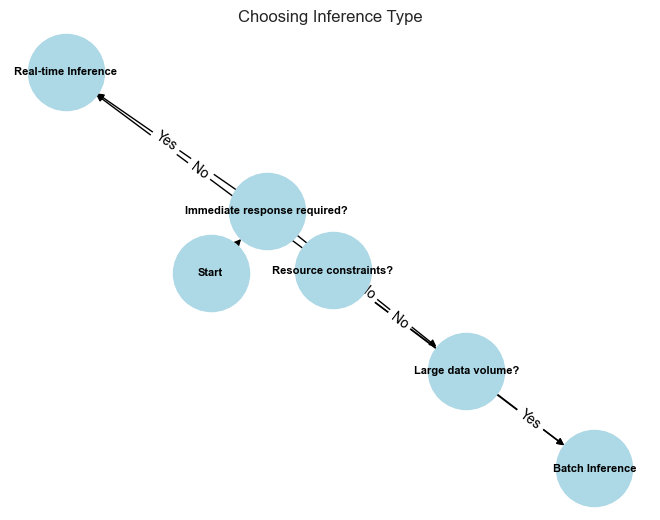

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def create_decision_tree():
    G = nx.DiGraph()
    G.add_edge("Start", "Immediate response required?")
    G.add_edge("Immediate response required?", "Real-time Inference", label="Yes")
    G.add_edge("Immediate response required?", "Large data volume?", label="No")
    G.add_edge("Large data volume?", "Batch Inference", label="Yes")
    G.add_edge("Large data volume?", "Resource constraints?", label="No")
    G.add_edge("Resource constraints?", "Batch Inference", label="Yes")
    G.add_edge("Resource constraints?", "Real-time Inference", label="No")

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000,
            font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Choosing Inference Type")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

create_decision_tree()


# Model serialization

Model serialization is the process of converting a trained machine learning model into a format that can be saved to disk and later reloaded to make predictions, without retraining. It's an essential step for deploying models in production, sharing them with others, or preserving them for reproducibility.

When you train a model using libraries like scikit-learn, XGBoost, or LightGBM, the model exists as an in-memory Python object. To use it outside of the training session (e.g., in a web server, application, or pipeline), you need to persist it using serialization.

Common libraries for serialization:





In [25]:
# joblib (recommended for scikit-learn models):

import joblib

# Save the model
joblib.dump(model, "model.pkl")

# Load the model
model = joblib.load("model.pkl")


NameError: name 'model' is not defined

In [26]:
# pickle: A general-purpose Python object serialization tool, though it may be less efficient than joblib for large NumPy arrays.

import pickle

# Serialize (save) the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Deserialize (load) the model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

NameError: name 'model' is not defined

In [27]:
# XGBoost and LightGBM have their own built-in save/load methods:

# XGB
model.save_model("xgb_model.json")
model = xgboost.XGBClassifier()
model.load_model("xgb_model.json")

# LGBM
model = LGBMClassifier()
model.fit(X_train, y_train)
model.booster_.save_model("lgbm_model.txt")

model = lgb.Booster(model_file="lgbm_model.txt")
model.predict(X_test)

NameError: name 'model' is not defined

In [28]:
# ONNX and PMML are standardized, cross-platform formats used for model interoperability across languages and platforms.

import onnx
import onnxruntime as ort

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Convert the model to ONNX format
initial_type = [("float_input", FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

# Load
sess = ort.InferenceSession("model.onnx")
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

ModuleNotFoundError: No module named 'onnx'

## Why serialization is important:

- Deployment: You can serve the serialized model through a web API without retraining it every time.
- Portability: Serialized models can be version-controlled, transferred across systems, or integrated into applications.
- Speed: Loading a serialized model is much faster than retraining it from scratch.
- Reproducibility: Ensures that predictions are based on the exact same model used during development.

Best practices:

- Always save both the model and any preprocessing steps (e.g., scalers, encoders) to avoid mismatches during inference.
- Store model version, training data schema, and training parameters alongside the serialized object for traceability.
- Use secure, trusted methods for loading serialized models to avoid arbitrary code execution risks, especially when using pickle.

# REST API

A REST API (Representational State Transfer) is a standardized way for software systems to communicate over the web using HTTP. It allows clients (like a frontend application, mobile app, or another service) to request or send data to a server.

Key Concepts of REST:

- Stateless: Each request is independent and contains all necessary information.
- HTTP Methods:
    - GET: Retrieve information
    - POST: Submit data
    - PUT: Update existing data
    - DELETE: Remove data
- Endpoints (URLs): Routes that map to resources or actions (e.g., /predict or /health).
- Data Format: Typically uses JSON to send/receive structured data.

In the context of machine learning:

1. A trained model is loaded in memory on a server.
2. A REST API exposes an endpoint (e.g., /predict) where clients can send new input data.
3. The server:
    - Accepts incoming data (via a POST request).
    - Passes it to the model for inference.
    - Returns the model’s prediction as a response.

### Why Use REST APIs for Model Serving?
- Decouples the model from the client.
- Allows you to serve models from any programming language.
- Makes it easy to scale and monitor inference services.

Popular Python frameworks to build REST APIs include:
- FastAPI (modern, fast, and built on Python 3.6+)
- Flask (lightweight and simple)
- Django REST Framework (for large applications)

In this course we will focus on the FastAPI. FastAPI is a high-performance Python web framework for building APIs. It’s especially good for serving machine learning models due to:
- Speed: Built on top of Starlette and Pydantic, it’s among the fastest Python web frameworks.
- Type safety: Uses Python type hints to auto-generate validation and OpenAPI documentation.
- Async support: Supports asynchronous request handling, useful for concurrent inference.
- Automatic documentation: Comes with built-in Swagger UI (/docs) and Redoc (/redoc).

# FASTAPI

# API Interactions from main.py

### Launch app
`fastapi % uvicorn main:app --reload`

### Add item to list
`curl -X POST -H "Content-Type: application/json" 'http://127.0.0.1:8000/items?item=apple'`

### Adding item in JSON payload
`curl -X POST -H "Content-Type: application/json" -d '{"text":"apple"}' 'http://127.0.0.1:8000/items'`


### Retrieve from list
`curl -X GET http://127.0.0.1:8000/items/1`


### Server documentation:
http://127.0.0.1:8000/docs#/

http://127.0.0.1:8000/redoc

### Export JSON Schema
http://127.0.0.1:8000/openapi.json

Note Flask is the industry standard tool

Here is an example for FastAPI inference project. File structure:

inference_app
| -- train.py
| -- app.py

## Steps

1. `python train.py`

2. `uvicorn app:app --reload`

3. `curl -X POST "http://localhost:8000/predict" -H "Content-Type: application/json" -d '{"features": [5.1, 3.5, 1.4, 0.2]}'`

# Streamlit

While Streamlit is fantastic for quickly building interactive apps to showcase and prototype machine learning models, it’s generally not recommended as a production-grade serving solution. It’s best suited for:

Rapid prototyping and experimentation
Internal demos or proofs of concept
Small-scale interactive tools used by data scientists or analysts
For production deployments, dedicated model serving frameworks like FastAPI, combined with containerization (Docker) and scalable infrastructure, are preferable because they offer better robustness, scalability, and security.

Streamlit example shows how you can build a Streamlit app that:
- Loads a saved model (iris_model.pkl) directly within the app
- Collects input features from the user via sliders
- Runs prediction locally (no external API calls)
- Displays the predicted class and probabilities

In [3]:
import streamlit as st
import joblib
import numpy as np

# Load the model once when the app starts
@st.cache_resource
def load_model():
    return joblib.load("model.pkl")

model = load_model()

st.title("Iris Classifier (Local Prediction)")

# Input features using sliders
sepal_length = st.slider("Sepal Length (cm)", 4.0, 8.0, 5.1)
sepal_width = st.slider("Sepal Width (cm)", 2.0, 4.5, 3.5)
petal_length = st.slider("Petal Length (cm)", 1.0, 7.0, 1.4)
petal_width = st.slider("Petal Width (cm)", 0.1, 2.5, 0.2)

if st.button("Predict"):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)[0]
    probabilities = model.predict_proba(features)[0]

    st.write(f"Predicted Iris class: {prediction}")
    st.write("Class probabilities:")
    for i, prob in enumerate(probabilities):
        st.write(f"Class {i}: {prob:.3f}")

2025-11-25 10:29:31.688 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10:29:31.730 
  command:

    streamlit run /Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-11-25 10:29:31.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10:29:31.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10:29:31.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10:29:31.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10:29:31.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-25 10

EOFError: 

# Cloud Deployment

In this part of the course, you will learn how to deploy machine learning applications in a robust, scalable, and production-ready way. We'll begin by introducing containerization with Docker, a powerful tool that lets you package your ML applications with all their dependencies, ensuring they run consistently across different environments. You'll learn how to build a Docker image of your application, push it to a registry, and deploy it using Google Cloud Run—a fully managed serverless platform. This setup is not only convenient for reproducibility and collaboration but also sets the foundation for scalable deployments. We will also explore orchestration tools like Docker Compose and Kubernetes to understand how large-scale systems coordinate multiple services.

The module then moves into critical production topics such as monitoring, security, CI/CD automation, and deployment strategies. You’ll explore how to track model performance and detect issues like data drift or concept drift using tools like Prometheus and MLflow. Security best practices will be covered using FastAPI, including HTTPS, API key protection, and CORS policies. You’ll also implement a CI/CD pipeline with GitHub Actions to automate testing and deployments. Finally, you’ll study deployment strategies—like canary releases, A/B testing, and blue-green deployments—to manage risk and maintain uptime when rolling out model updates. Through hands-on exercises, you'll apply these concepts to real-world scenarios, giving you the skills to move from prototype to production with confidence.

### Containerization

Docker is a platform that enables developers and data scientists to package applications and their dependencies into a single, portable unit called a container. Containers encapsulate everything needed to run an application—including code, libraries, system tools, and settings—so it behaves the same regardless of the environment it's run in. This solves one of the most common problems in software deployment: the "it works on my machine" issue.

In data science, Docker is especially valuable because machine learning models often rely on specific versions of libraries such as NumPy, pandas, scikit-learn, TensorFlow, or PyTorch. When deploying a model, it's essential to reproduce the development environment exactly. Docker makes this possible by letting you define the environment in a Dockerfile, which acts like a blueprint for building the container. The resulting image can then be run on any system with Docker installed, whether it’s a local machine, a server, or a cloud platform.


### Commands

- `docker images` - See all images
- `docker ps` - See all containers
- `docker pull nginx:1.29.3` - Pull an official image (Example is nginx)
- `docker pull nginx` - Pull the latest official image (Example is nginx)
- `docker run nginx:1.29.3` - Launch an image which starts a container
- `docker run -d nginx:1.29.3` - Launches image without the logs appearing in terminal window
- `docker logs 0344571dbfb161b998b5af8077157fe1aa94134a5777cb737af34c9afd586719` - Retrieves logs from a specific container (This is an example id)
- `docker run nginx:1.28.0` - If you don't have an image downloaded locally (pull) then docker will download and run it for you
- `docker stop 0344571dbfb1` - Stops running container based on ID
- `docker ps -a` - Shows all stopped containers
- `docker start 41e4c3441de6` - Relaunch an old container. You cal also use the container name





### Port Binding
The standard is to use the same port for container and host

- `docker run -d -p 9000:80 nginx:1.29.3` - Run docker container and bind nginx's port (9000) to our local host port (80) -p {HOST_PORT}:{CONTAINER_PORT}
- local host address: http://localhost:9000/
- `docker run --name web-app -d -p 9000:80 nginx:1.29.3` - Launching container with specific name while port binding


### Deploying Docker Image
-  `docker build -t node-app:1.0 .` - Build docker image with tag name "node-app:1.0" in the current directory (".")
-  `docker run -d -p 3000:3000 node-app:1.0` - Run the container based on "node-app:1.0" image and port bind to 3000

More resources here:
- https://github.com/patrickloeber/python-docker-tutorial

# Google Cloud Deployment

- https://github.com/NeuralNine/youtube-tutorials/tree/main/Todo%20List%20App%20Flask
- Google Cloud Console: https://console.cloud.google.com/welcome/new

### Google CMD prompts:

- `glcoud init` - initialise GCP on your machine




### CMDs
- `gunicorn --bind 0.0.0.0:8080 app:app` - run locally using gunicorn

# Monitoring and maintenance

- https://betterstack.com/community/guides/monitoring/prometheus-python-metrics/